# In-Class Exercise: Simulating Gravity with Euler's Method

**Objective:** Use Euler's Method to simulate a falling object under different physical conditions.

### The Core Algorithm (Euler's Method)
We start with Newton's Second Law to find the acceleration (the slope of velocity).
Then we use the current state to predict the future state one small step ($dt$) at a time:

1. **Get Slope:** $a = F_{net} / m$
2. **Update Position:** $y_{new} = y_{old} + v_{old} \cdot dt$
3. **Update Velocity:** $v_{new} = v_{old} + a \cdot dt$
4. **Repeat**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Part 1: Linear Drag (Recreating the Lecture)

Simulate a ball dropping with **Linear Air Resistance**. 

**The Physics:**
* Gravity: $F_g = -mg$
* Drag: $F_{drag} = -b v$ (Opposes velocity)
* Acceleration: $a = -g - (b/m)v$

**Parameters:**
* $y_0 = 100$ meters
* $v_0 = 0$ m/s
* $g = 9.81$ m/s$^2$
* $b = 0.5$ (Drag coefficient)
* $m = 1.0$ kg
* $dt = 0.05$ s

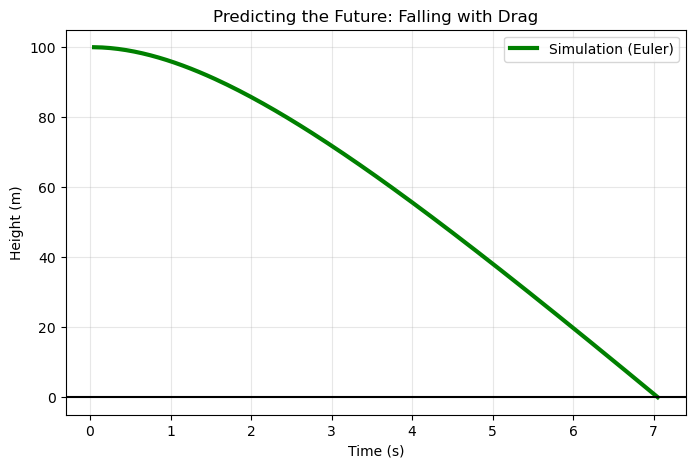

In [3]:
# 1. SETUP PARAMETERS
y = 100.0       # initial height (meters)
v = 0.0         # initial velocity (m/s) // starting at rest
g = 9.81        # meters/second^2
b = 0.5         # drag coefficient // no units
m = 1.0         # mass (kilograms)
dt = 0.05       # time step in s (seconds)

# Lists to store the history (for plotting): Initialize these here! 

t_list = []      #making a list uses only brackets
y_list = []
v_list = []

# 2. THE SIMULATION LOOP
t = 0
while y > 0: # Run until it hits the ground
    
    # --- TODO: FILL IN THE PHYSICS HERE ---
    # 1. Calculate Acceleration (a = F_net / m)
    # Hint: Remember gravity points down (-), drag opposes velocity
    a = a = -g - (b * v)  # Coming from F = ma

    # 2. Update Position (Euler Step)
    y = y + v * dt  #updating position      // old position *vdt
    
    # 3. Update Velocity (Euler Step)
    v = v + a * dt  #updating velocity      // old velocity *adt
    
    # 4. Advance Time
    t += dt     #+= is increment 
    
    # Store results
    t_list.append(t)     #always store this at the end of the code but before the plot
    y_list.append(y)
    v_list.append(v)


#make an array after making a list
t_list_array = np.array(t_list)
y_list_array = np.array(y_list)


# 3. PLOT
#Make sure to add an x label and y label with units, and give it a title and legend. 
plt.figure(figsize=(8,5))
plt.plot(t_list_array, y_list_array, linewidth=3, color= 'green', label='Simulation (Euler)')
plt.title("Predicting the Future: Falling with Drag")
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")
plt.axhline(0, color='black') # Ground but it's a black line at the zero mark on y axis
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


#LOOKS FANTASTIC // P.S. supposed to look like the one from lecture notes

## Part 2: The Vacuum Test (Verification)

How do we know our code actually works? We compare it to a problem we can solve by hand.

**The Task:**
1. Copy your loop from Part 1.
2. **Remove the drag term** from the acceleration line ($b=0$).
3. Plot your simulation on top of the exact kinematic equation: $y(t) = y_0 - \frac{1}{2}gt^2$.

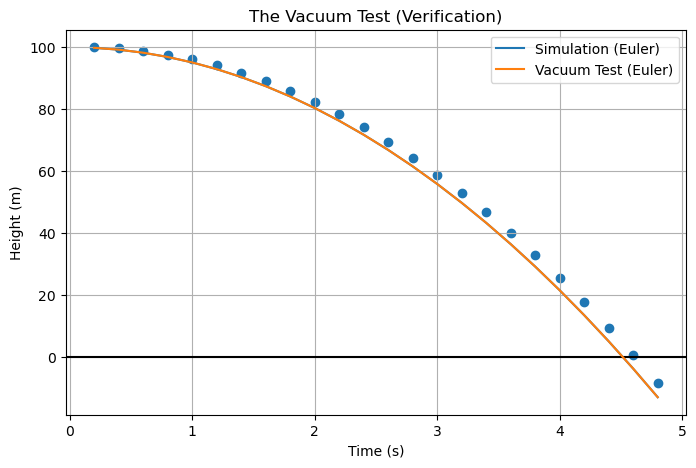

In [4]:
# 1 // Reset Initial Conditions
y = 100.0       # initial height (meters)
v = 0.0         # initial velocity (m/s) // starting at rest
t = 0           #initial time (s) // starting at rest
g = 9.8         # meters/second^2
dt = 0.2        # time step in s (seconds)

#Initialize!
t_vac = []     #makes a list (not simulation)
y_vac = []
v_vac = []
t_sim = []
y_sim = []
v_sim = []

# 3 // Vacuum Application
t=0
while y > 0:
    # --- TODO: MODIFY PHYSICS FOR VACUUM ---
                        # Only gravity acts on the ball
    a = -g              # Coming from F = ma // there is no drag force....there is only gravity
    y = y + v * dt      #updating position      // old position *vdt 
    v = v + a * dt      #updating velocity      // old velocity *adt 
    t += dt             #+= is increment
                        #store results
    t_sim.append(t)
    y_sim.append(y)    
    v_sim.append(v)

# ANALYTICAL SOLUTION (Kinematics)
t_vac_array = np.array(t_sim)
y_vac_array = 100.0 - 0.5 * g * t_vac_array**2      #treat it as a kinematics formula...no longer a siumlation

# PLOT COMPARISON
#make sure you label your plots!
plt.figure(figsize=(8,5))
plt.scatter(t_sim, y_sim)          # Dots for sim
plt.plot(t_vac_array, y_vac_array, label='Simulation (Euler)')
plt.axhline(0, color='black')                    # Ground but it's a black line at the zero mark on y axis  ////  # Line for theory
plt.plot(t_vac_array, y_vac_array, label='Vacuum Test (Euler)')
plt.title("The Vacuum Test (Verification)")
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")
plt.grid()
plt.legend()
plt.show()

In [5]:
#Lecture Question Pendulum Problem
#plot angle vs time             // part a
#plot energy vs time (next)     // part b

## Part 3: Quadratic Drag (The Physics Extension)

For most fast-moving objects (baseballs, rocks, cars), air resistance isn't proportional to $v$, it's proportional to $v^2$.

**The Physics:**
* $F_{drag} = -c v^2$ (approx)
* Acceleration: $a = -g + (c/m)v^2$ 
* *Note: Since the ball is falling down ($v$ is negative), $v^2$ is positive. Drag points UP (positive). So we add the term.*

**Task:**
Modify your loop to use Quadratic Drag. Use a coefficient $c = 0.05$.

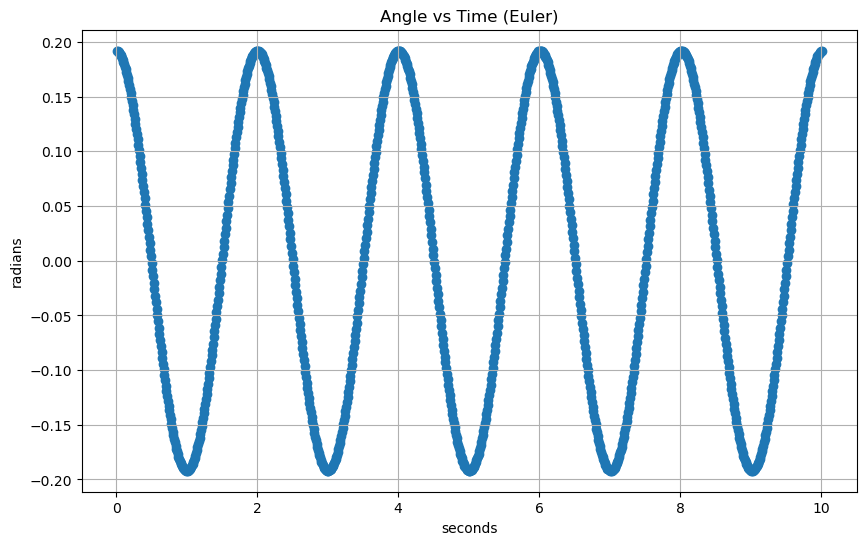

In [6]:
# PART A.... angle versus time

L = 1.0         # meters
c = 0.05        # Quadratic drag coefficient
g = 9.81        # meters/second^2
dt = 0.01        # time step in seconds
theta  = 11*np.pi/180     #radians
omega = 0           # w = zero

time_quad = []       # x position
theta_quad = []      # theta position // sort of like y variable
                     # this makes an x/y table to plot little values of dt

t = 0                 # initial time (s) // starting at rest // can define it in this loop
while t < 10:          # the loop will run and it stops at 5....to not accidentally create an infinity loop
    a = (-g / L*theta)
    omega = omega + a*dt          # omega has to go before theta because in the loop it's increasing the angle first...syntax issue
    theta = theta + dt*omega
    t += dt                 #  unknown values in a list to find known values from a loop    
    time_quad.append(t)
    theta_quad.append(theta)

# Need a separate array for time and theta
time_array = np.array(time_quad)
theta_array = np.array(theta_quad)

# PLOT ALL THREE TOGETHER
plt.figure(figsize=(10,6))
plt.scatter(time_array, theta_array)
plt.title("Angle vs Time (Euler)")
plt.xlabel("seconds")
plt.ylabel("radians")
plt.grid()
plt.show()

### Discussion Question
Look at Part 2 (Vacuum). Does the Simulation perfectly match the Exact line? If you zoom in, you might see them drifting apart. Why? How could you fix it?

In [7]:
#Lecture Question Pendulum Problem
#plot angle vs time             // part a
#plot energy vs time (next)     // part b

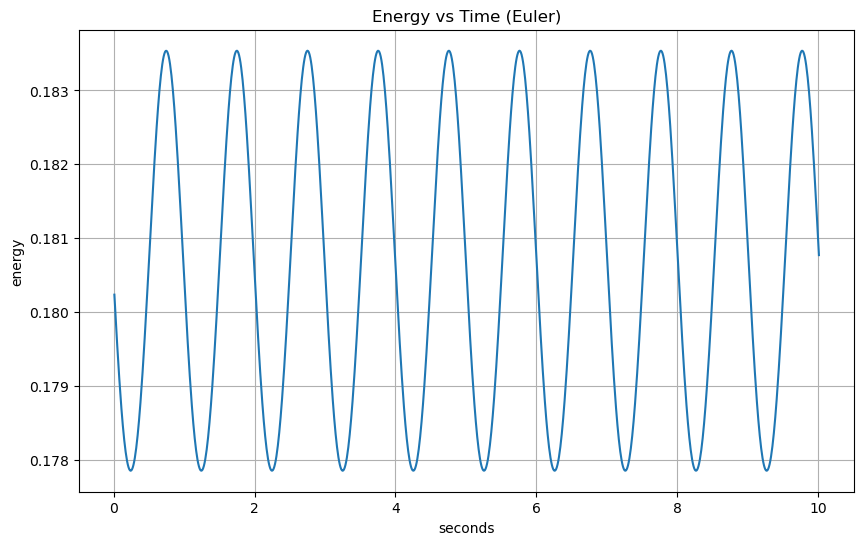

In [8]:
# PART A.... angle versus time

L = 1.0         # meters
g = 9.81        # meters/second^2
dt = 0.01       # time step in seconds
theta  = 11*np.pi/180     #radians
omega = 0

time_quad = []         # x position
energy = []      # theta position // sort of like y variable
                       # this makes an x/y table to plot little values of dt

t = 0                 # initial time (s) // starting at rest // can define it in this loop
while t < 10:          # the loop will run and it stops at 5....to not accidentally create an infinity loop
    a = (-g / L*theta)
    k = (1/2)*L*omega**2          # k = 1/2mv^2 but not here...mass is irrelevant & we're focused on anglular momentum
    u = g*L*(1-np.cos(theta))
    total_energy = k + u
    omega = omega + a*dt          # omega has to go before theta because in the loop it's increasing the angle first...syntax issue
    theta = theta + dt*omega
    t += dt                 #  unknown values in a list to find known values from a loop    
    time_quad.append(t)
    energy.append(total_energy)

# Need a separate array for time and theta
time_array = np.array(time_quad)
energy_array = np.array(energy)

# PLOT ALL THREE TOGETHER
plt.figure(figsize=(10,6))
plt.plot(time_array, energy_array)
plt.title("Energy vs Time (Euler)")
plt.xlabel("seconds")
plt.ylabel("energy")
plt.grid(True)
plt.show()